# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### 1.Is the distribution of body temperatures normal? 

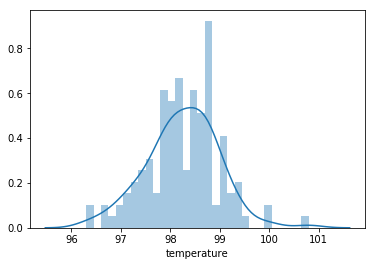

In [10]:
import seaborn as sns
sns.distplot(df['temperature'], bins=30)

mean is: 98.2492307692
standard error is : 0.730357778905


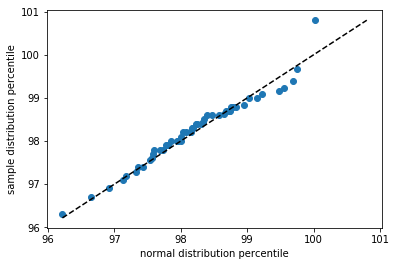

In [79]:
# do a q-q plot to best illustrate:
import numpy as np
import matplotlib.pyplot as plt

mean_sp = np.mean(df['temperature'].values)
print "mean is:", mean_sp
std_sp = np.std(df['temperature'].values)
print "standard error is :", std_sp

syn = np.random.normal(mean_sp,std_sp,len(df))
percs = np.linspace(0,100,51)
qn_syn = np.percentile(syn, percs)
qn_sp = np.percentile(df['temperature'].values, percs)

plt.plot(qn_syn,qn_sp, ls="", marker="o")
plt.xlabel('normal distribution percentile')
plt.ylabel('sample distribution percentile')

x = np.linspace(np.min((qn_syn.min(),qn_sp.min())), np.max((qn_syn.max(),qn_sp.max())))
plt.plot(x,x, color="k", ls="--")

plt.show()

#### [ANS] The distribution of body temperature is similar to normal

### 2. Is the sample size large? Are the observations independent? 

In [50]:
print "sample size is:", len(df)

sample size is: 130


#### [ANS] Since (1) the data sample size 130 > 30 . (2) In the source description of the data , the sample values of body temperatures were derive from "normal temperatures taken at several different times during two consecutive days, resulting in 700 total readings, from 122 male and 26 females". It is reasonable to believe samples were taken in a way that observations are independent. 

### 3. Is the true population mean really 98.6 degrees F?

In [51]:
# Bootstrap hypothesis test:
## H0: T=98.6 degrees
## H1: T != 98.6 degrees
## chose  a 5% significance level
#  first build a function to perform bootstrap statistics
def bootstrap_replica_1d(data, func):
    """Generate bootstrap replica of 1d data"""
    import numpy as np
    bs_sample= np.random.choice(data, len(data))
    return func(bs_sample)

In [67]:
bs_mean = np.empty(1000)
fake_data = df['temperature'].values-mean_sp+98.6  # shift the mean of bootstrap to 98.6
for i in range(1000):  ## construct bootstrap sample size 1000
    bs_mean[i]= bootstrap_replica_1d(fake_data, np.mean)

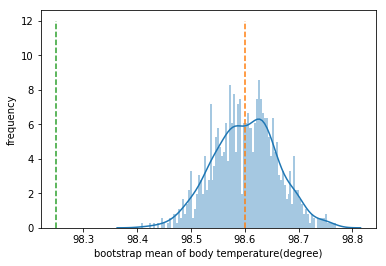

In [68]:
_ = sns.distplot(bs_mean, bins=100)
_ = plt.plot([np.mean(bs_mean),np.mean(bs_mean)],[0,12], linestyle='--')
_ = plt.plot([np.mean(df['temperature'].values),np.mean(df['temperature'].values)],[0,12], linestyle='--')
plt.xlabel('bootstrap mean of body temperature(degree)')
plt.ylabel('frequency')

In [75]:
dev=98.6-mean_sp
upper = 98.6+dev
print "above and below:", upper, mean_sp
print "P-value is:", ((bs_mean < mean_sp).sum()/1000) +((bs_mean > upper).sum()/1000)

above and below: 98.9507692308 98.2492307692
P-value is: 0


#### [ANS 2.1] Taking the proportion of the bootstrap samples (which is mean = 98.6), where the distribution below  98.25(true sample mean) or above 98.95. The bootstrap sample provide 0% . Since  0% < 5%, H0 is rejected. Therefore , the mean of the true population is not 98.6

### try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
### In this situation, is it appropriate to use the t or z statistic? 
#### [ANS] One-sample test. Since the question is targeted to know if test-statistics equates one value. Since sample size is large(way > 30), and normally distributed, it is reasonable to believe the mean is normally distributed and abid by CLT. A z statistic test is valid.

In [78]:
#  calculate z test :
z_val = (mean_sp-98.6)/(std_sp/np.sqrt(len(df)))
print z_val

-5.47592520208


![normal distribution probability z-table](http://www.z-table.com/uploads/2/1/7/9/21795380/9340559_orig.png "normal distribution probability z-table")
#### Based on the standard normal distribution z value probability, z =-5.476 indicates probability < 0.0002 (.02%) . This is way below 5%, so H0 is rejected.

#### Now try using the other test. How is the result be different? Why? 

In [85]:
#  construct confidence interval of z and t test
## define confidence level 95% -- 2.5% (.025) from z-table 
z_crit = -1.96  ## check the z-table above
z_range = [mean_sp + z_crit*(std_sp/np.sqrt(130)), mean_sp-z_crit*(std_sp/np.sqrt(130))]
print " confidence interval from z-test for mean estimated from this sample population is:", z_range

 confidence interval from z-test for mean estimated from this sample population is: [98.123679804428164, 98.374781734033334]


![normal distribution probability t-table](https://d2vlcm61l7u1fs.cloudfront.net/media%2F60a%2F60af5890-13ec-42d3-a274-5fc733ec37a4%2FphpYSVwdO.png "normal distribution probability t-table")

In [88]:
## confidence level 95% -- 2.5% (.025)to the right
deg_f = 129 #degree of freedom
t_crit =  1.984 ## close to 
t_range = [mean_sp - t_crit*(std_sp/np.sqrt(130)), mean_sp+t_crit*(std_sp/np.sqrt(130))]
print " confidence interval from t-test for mean estimated from this sample population is:", t_range

 confidence interval from t-test for mean estimated from this sample population is: [98.122142445675479, 98.376319092786019]


#### [ANS] Both z and t test yields the same result that the confidence interval do not contain 98.6, therefore giving us the same result

### 4.Draw a small sample of size 10 from the data and repeat both frequentist tests
Which one is the correct one to use? What do you notice? What does this tell you about the difference in application of the t and z statistic? 

In [99]:
# draw sample
sp_10 = np.random.choice(df['temperature'].values, 10)
sp_10

array([ 98.8,  98.4,  98.8,  98.8,  97.2,  97.9,  97.8,  98.5,  98.6,  98. ])

In [94]:
mean_sp10 = np.mean(sp_10)
std_sp10 = np.std(sp_10)
print "mean is :", mean_sp10
print "standard error is:",std_sp10

 mean is : 98.04
standard error is: 0.748598690889


In [102]:
z_range = [mean_sp10 + z_crit*(std_sp10/np.sqrt(10)), mean_sp10-z_crit*(std_sp10/np.sqrt(10))]
print " confidence interval of the mean for z-test from this sample population is:", z_range

 confidence interval of the mean for z-test from this sample population is: [97.576013724340896, 98.503986275659088]


In [101]:
deg_f = 9 #degree of freedom
t_crit =  1.833 ## close to 
t_range = [mean_sp10 - t_crit*(std_sp10/np.sqrt(10)), mean_sp10+t_crit*(std_sp10/np.sqrt(10))]
print " confidence interval of the mean for t-test from this sample population is:", t_range

 confidence interval of the mean for t-test from this sample population is: [97.606078141182067, 98.473921858817917]


#### [ANS] For small sample size(<30) , and when population standard deviation is unknown, one should use t-test.
#### From this example of a small sample size, t-test gave a tighter confidence interval than z-test around the mean.

### 5. At what temperature should we consider someone's temperature to be "abnormal"? As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach. 
• Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws. 


In [104]:
# margin of error
se = std_sp/np.sqrt(130)
# z-critical value for a 95% confidence level:
z_crit = 1.96
moe = z_crit*se
print "normal temperature should fall in:",mean_sp-moe, mean_sp+moe

normal temperature should fall in: 98.1236798044 98.374781734


#### [ANS] Temperature outside of 98.12 and 98.37 is abnormal

### 6.Is there a significant difference between males and females in normal temperature? 
• What testing approach did you use and why? 

• Write a story with your conclusion in the context of the original problem.


In [109]:
male_t=df.loc[df['gender']== 'M']['temperature'].values
female_t=df.loc[df['gender']== 'F']['temperature'].values

In [128]:
male_mean = np.mean(male_t)
male_std = np.std(male_t)
female_mean = np.mean(female_t)
female_std = np.std(female_t)
print "male body temperature mean:", male_mean
print "female body temperature mean:", female_mean

male body temperature mean: 98.1046153846
female body temperature mean: 98.3938461538


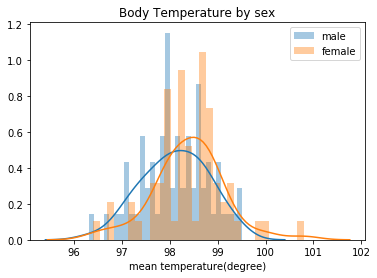

In [122]:
sns.distplot(male_t, bins=30, label='male')
sns.distplot(female_t, bins=30, label='female')
plt.xlabel('mean temperature(degree)')
plt.legend()
plt.title('Body Temperature by sex')
plt.show()

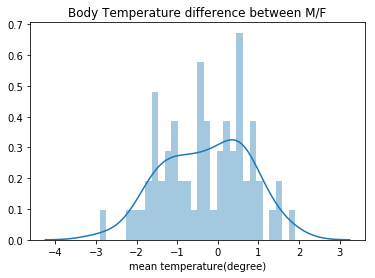

In [125]:
sns.distplot(male_t-female_t, bins=30)
plt.xlabel('mean temperature(degree)')
plt.title('Body Temperature difference between M/F')

In [131]:
## Do hypothesis testing, two sample z test
# Null hypothesis, H0 : no difference, male mean T = female mean T
# H1: male mean T!= female mean T
# significance level = 95%
std_diff = np.sqrt((std_sp**2)*2/65) ## This std is based on H0 , that mean body T of male = mean body T of female

In [138]:
z_val = (male_mean-female_mean-0)/std_diff
print "z is:", z_val

z is: -2.25761828507


#### [ANS]  Given that the z value = -2.25, the probability of getting this statistic is .0122 from the z-table above, that is 1.2%. Since 1.2% < 5% , the H0 should be rejected if we set significance level = 95%. This suggests that there is significant difference between male and female body temperature.